In [2]:
import numpy as np
import pandas as pd

# libraries for plotting graphs/animations
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.collections import CircleCollection, PatchCollection, LineCollection
from matplotlib.patches import Circle
from matplotlib.widgets import Slider

from IPython.display import HTML

In [27]:
np.linspace(0, 1, 10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [32]:
# %matplotlib notebook
%matplotlib notebook

def animateDiscreteWalk(points, radii=[], figsize=(8,8)):
    '''
    :param points: A set of points
    '''
    def discretise(start, end, frames):
        t = np.linspace(0, 1, frames)
        x = t*end[0] + (1-t)*start[0]
        y = t*end[1] + (1-t)*start[1]
        return np.array(x), np.array(y)
    
    FRAMES = [7,13]
    NUM_POINTS = len(points)
    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    
    x_start = min(points[:,0])
    x_end = max(points[:,0])
    y_start = min(points[:,1])
    y_end = max(points[:,1])
    
    # uncomment if you want the whole plot with no margins, no x, y axis at all
#     fig.add_axes([0, 0, 1, 1])

    ax.set_xlim(x_start, x_end)
    ax.set_ylim(y_start, y_end)
    
    x_all = []
    y_all = []
    
    for i in range(NUM_POINTS-1):
        x, y = discretise(points[i], points[i+1], FRAMES[i])
        x_all.append(x)
        y_all.append(y)
    
    ax.scatter(x_all[0], y_all[0])
    
    def animate(i):
        ax.plot(x_all[:i], y_all[:i], linestyle="--")
        
#         if i == FRAMES[0]:
#             plt.scatter(points[:i,0], points[:i,1])
        
    # Construct the animation, using the update function as the animation director.
    anim = FuncAnimation(fig, animate, frames=sum(FRAMES), repeat=False, blit=False)
    plt.close()
    return anim
    
def movingCircles(startPoints, destPoints, radii, frames=20, figsize=(8,8)):
    '''
    Animates the movement of any arbitrary number of circles.
    The circles' radii is fixed across time and can only travel in a straight line.
    The radii are not to scale but are proportional to other radii.
    
    :param startPoints: an np.array of floats of size = (N,2) for any integer N
    :param destPoints: an np.array of floats of size = (N,2) for any integer N
    :param radii: an np.array of floats of size = (N,1) for any integer N, 
        radii[i] is the radius of the ith circle travelling from startPoints[i] to destPoints[i]
    :param frames: number of frames for the animation
    :param figsize: size of the plot of the animation
    :return: a video of the animation
    '''
    NUM_POINTS = len(startPoints)
    
    # Create new Figure
    fig, ax = plt.subplots(1,1,figsize=figsize)
    
    # specify the dimensions of the plot
    x_start = min(min(startPoints[:,0]), min(destPoints[:,0]))
    x_end = max(max(startPoints[:,0]), max(destPoints[:,0]))
    y_start = min(min(startPoints[:,1]), min(destPoints[:,1]))
    y_end = max(max(startPoints[:,1]), max(destPoints[:,1]))

#     uncomment if you want the whole plot with no margins, no x, y axis at all
#     ax = fig.add_axes([0, 0, 1, 1])

    ax.set_xlim(x_start, x_end)
    ax.set_ylim(y_start, y_end)
    
    # creating a collection of circles
    patches = []
    for i in range(NUM_POINTS):
        patches.append( Circle((startPoints[i,0], startPoints[i,1]), radii[i]) )
    
    # style the collection of circles
    collection = PatchCollection(patches, edgecolors='b', facecolors='none')

    # add the circles to the plot
    ax.add_collection(collection)
        
    def updateOnept(start, end, i):
        '''
        :param start: starting (x,y)-coordinate
        :param end: ending (x,y)-coordinate
        :param i: the ith step
        :return: discretise the line segment from start to end into `frames` number of points and
            returns the ith point
        '''
        t = np.linspace(0, 1, frames+1)
        x = t[i]*end[0] + (1-t[i])*start[0]
        y = t[i]*end[1] + (1-t[i])*start[1]
        
        return np.array([x,y])
    
    def animate(i):
        '''
        shift the centers of the circles by some distance and plot the scatterplot
        :param i: index i
        :return scat: the scatter plot
        '''
        updated_pts = np.zeros((NUM_POINTS,2))
        
        # update the centers of the circles
        for j in range(NUM_POINTS):
            updated_pts[j] = updateOnept(startPoints[j], destPoints[j], i)
        
        # append the circles with new centers
        patches = []
        for j in range(NUM_POINTS):
            circle = plt.Circle((updated_pts[j,0], updated_pts[j,1]), radii[j])
            patches.append(circle)

        # Update the collection, with the objects (Circle etc)
        collection.set_paths(patches)
        
    # Construct the animation, using the update function as the animation director.
    anim = FuncAnimation(fig, animate, frames=frames, repeat=False, blit=False)
    
    return anim

In [50]:
import matplotlib
matplotlib.lines??

<IPython.core.display.Javascript object>


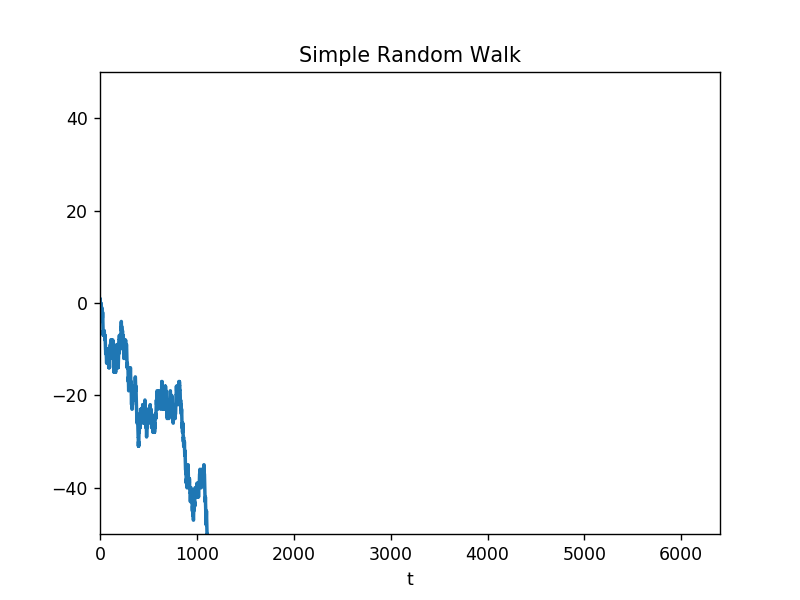

In [44]:
import time
def random_walk(input):
    r = np.random.uniform(0,1,1)
    if r <=0.33:
        z = 1
    elif r > 0.33 and r <=0.66:
        z = 0
    else:
        z = -1
    return input + z

def animate(i):
    global rw_array,z,T
    z = random_walk(z)
    rw_array.append(z)
    line.set_data(np.arange(len(rw_array)),np.array(rw_array))
    if len(rw_array) >= T:
        T = T * 2
        plt.xlim(0,T)
    return line,

def init():
    line.set_data([],[])
    return line,

T = 100
rw_array=[]
z = 0

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.ylim(-50,50)
plt.xlim(0,T)
plt.xlabel('t')
plt.title('Simple Random Walk')
line, = ax.plot([],[],lw=2)

anim = FuncAnimation(fig, animate, init_func=init, frames=200, interval=50, blit=True)
plt.show()

In [21]:
points = np.array([[1,1], [5,3], [7,9]])
points.shape

(3, 2)

<IPython.core.display.Javascript object>


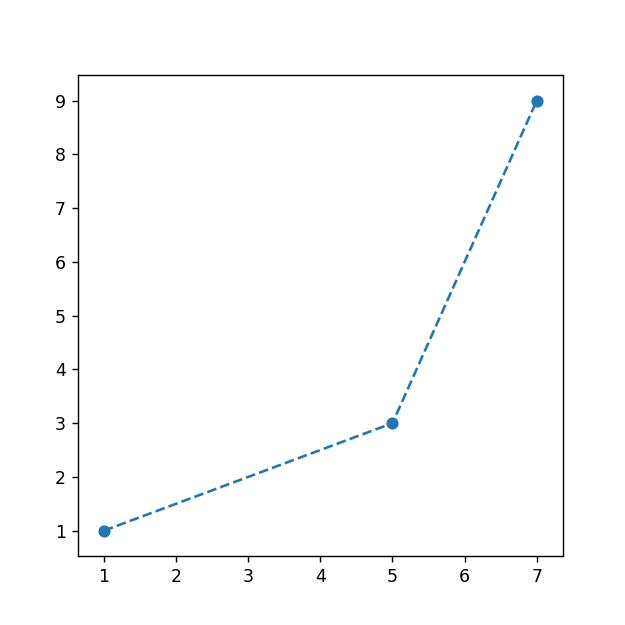

In [26]:
fig, ax = plt.subplots(1,1, figsize=(5,5))

plt.plot(points[:,0], points[:,1], linestyle='--')
plt.scatter(points[:,0], points[:,1])

plt.show()

<IPython.core.display.Javascript object>


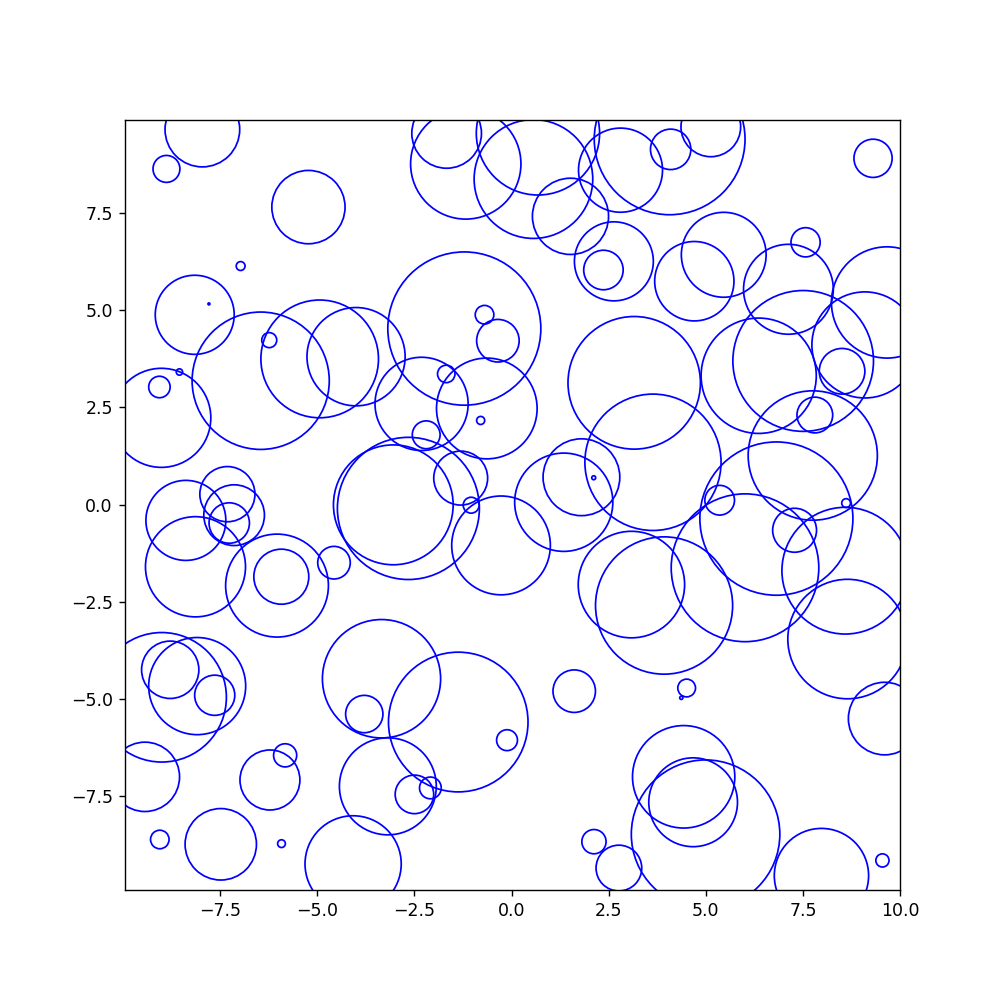

In [14]:
NUM_POINTS = 100

# randomly generate decimals in [-10,10], where array size is (NUM_POINTS,2)
startPoints = np.random.uniform(-10,10, size=(NUM_POINTS,2))
destPoints = np.random.uniform(-10,10, size=(NUM_POINTS,2))

# randomly generate decimals in [0,2], where array size is (NUM_POINTS,1)
radii = np.random.uniform(0,2, size=(NUM_POINTS,1))

animation = movingCircles(startPoints, destPoints, radii, frames=51)

In [23]:
video = HTML(animation.to_html5_video())
video